In [1]:
import plha
import numpy as np
import matplotlib.pyplot as plt

output_data = plha.get_hazard("config.json")
output = output_data["output"]
input = output_data["input"]

Text(0, 0.5, 'annual rate of exceedance, $\\lambda$ [$yr^{-1}$]')

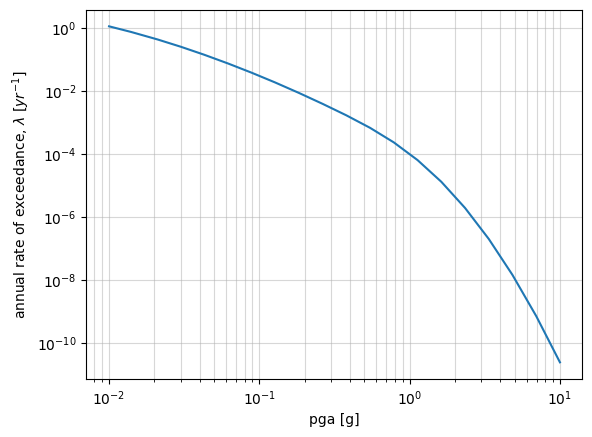

In [3]:
fig, ax = plt.subplots()

ax.plot(output["psha"]["PGA"], output["psha"]["annual_rate_of_exceedance"])
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(True, alpha=0.5, which="both")
ax.set_xlabel("pga [g]")
ax.set_ylabel(r"annual rate of exceedance, $\lambda$ [$yr^{-1}$]")

Text(0, 0.5, 'annual rate of nonexceedance, $\\Lambda$ [$yr^{-1}$]')

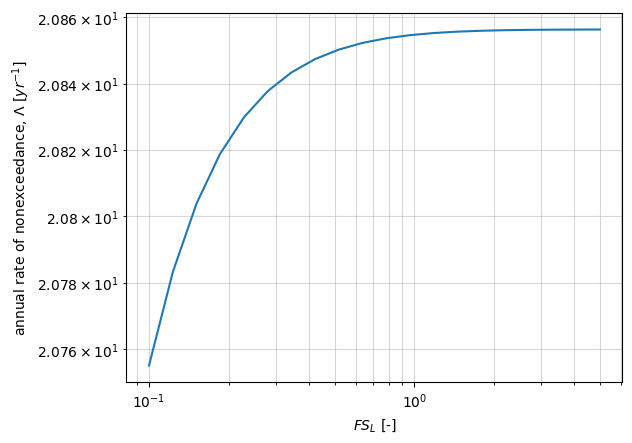

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(output["plha"]["FSL"], output["plha"]["annual_rate_of_nonexceedance"])
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(True, alpha=0.5, which="both")
ax.set_xlabel(r"$FS_L$ [-]")
ax.set_ylabel(r"annual rate of nonexceedance, $\Lambda$ [$yr^{-1}$]")

In [5]:
import json

magnitude_bin_edges = np.asarray(
    input["output"]["psha"]["disaggregation"]["magnitude_bin_edges"]
)
distance_bin_edges = np.asarray(
    input["output"]["psha"]["disaggregation"]["distance_bin_edges"]
)
epsilon_bin_edges = np.asarray(
    input["output"]["psha"]["disaggregation"]["epsilon_bin_edges"]
)
pga = np.asarray(input["output"]["psha"]["pga"])
m_center = 0.5 * (magnitude_bin_edges[0:-1] + magnitude_bin_edges[1:])
r_center = 0.5 * (distance_bin_edges[0:-1] + distance_bin_edges[1:])
epsilon_center = 0.5 * (epsilon_bin_edges[0:-1] + epsilon_bin_edges[1:])

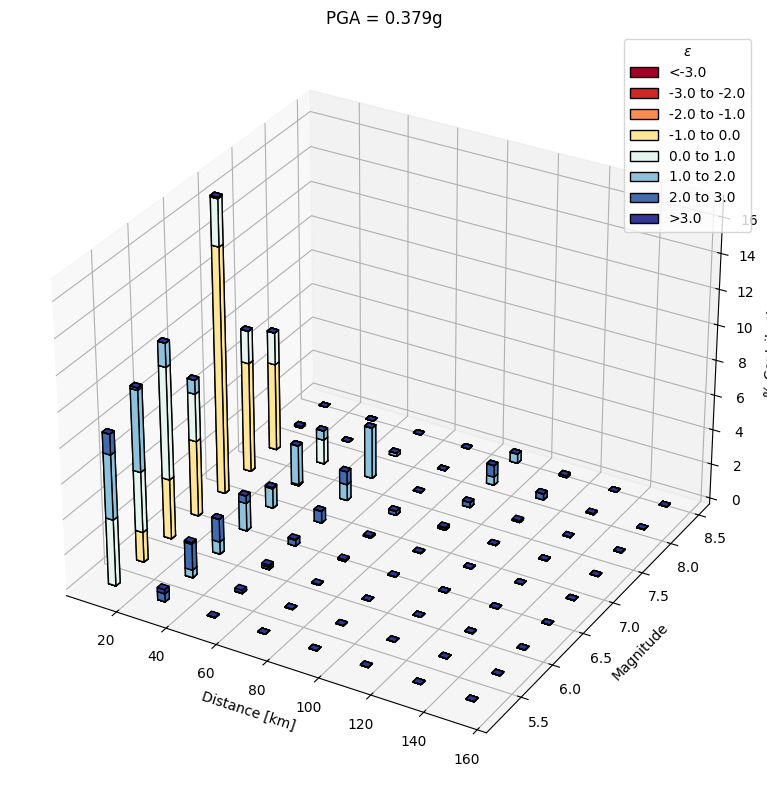

In [6]:
import matplotlib.pyplot as plt

pga_index = 10
_xx, _yy = np.meshgrid(r_center, m_center)
x, y = _xx.ravel(), _yy.ravel()
disagg = np.asarray(output["psha"]["disaggregation"], dtype=float)

if len(m_center) > 1:
    depth = (m_center[1] - m_center[0]) * 0.15
else:
    depth = 1

if len(r_center) > 1:
    width = (r_center[1] - r_center[0]) * 0.15
else:
    width = 1
bottom = np.zeros(len(x))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))

my_cmap = plt.get_cmap("RdYlBu")


def rescale(e):
    return (e - epsilon_bin_edges[1]) / (epsilon_bin_edges[-2] - epsilon_bin_edges[1])


alpha = 0.1
for i, e in enumerate(epsilon_center):
    top = disagg[pga_index, :, :, i].ravel()
    if i == 0:
        label = "<" + str(epsilon_bin_edges[1])
    elif i == len(epsilon_center) - 1:
        label = ">" + str(epsilon_bin_edges[-2])
    else:
        label = str(e - 0.5) + " to " + str(e + 0.5)
    ax.bar3d(
        x,
        y,
        bottom,
        width,
        depth,
        top,
        shade=True,
        label=label,
        zsort="max",
        edgecolor="black",
        facecolor=my_cmap(rescale(e)),
    )
    bottom += disagg[pga_index, :, :, i].ravel()
ax.set_title("PGA = " + str(np.round(pga[pga_index], 3)) + "g")
ax.legend(title=r"$\varepsilon$")
ax.set_xlabel("Distance [km]")
ax.set_ylabel("Magnitude")
ax.set_zlabel("% Contribution")
plt.tight_layout()